# Baseline model
Training Naive Bayes on the data

In [8]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

games = pd.read_csv("avg_team_attr_by_game.csv", index_col=0)


In [9]:
games.head()

,game_id,game_date,t1_avg_gp,t1_avg_minutes,t1_avg_pts,t1_avg_oreb,t1_avg_dreb,t1_avg_reb,t1_avg_asts,t1_avg_stl,...,t2_avg_pf,t2_avg_fga,t2_avg_fgm,t2_avg_fta,t2_avg_ftm,t2_avg_tpa,t2_avg_tpm,t1_team_ilkid,t2_team_ilkid,winner
0,29600012,1996-11-01 00:00:00,58.044444,20.621097,8.956167,1.018667,2.458639,3.478097,2.257903,0.682903,...,2.057056,7.413583,3.327046,1.910250,1.420528,1.855657,0.656852,"['JONESED01', 'SCOTTBY01', 'FISHEDE01', 'KNIGH...","['MANNIDA01', 'KLEINJO01', 'KLEINJO01', 'KLEIN...",0
1,29600027,1996-11-03 00:00:00,71.388889,24.334444,11.026667,1.338889,3.030000,4.369444,2.382778,0.820556,...,2.292778,7.477222,3.476111,2.456111,1.857778,1.098333,0.358889,"['JONESED01', 'SCOTTBY01', 'FISHEDE01', 'KNIGH...","['MITCHSA01', 'GARNEKE01', 'CARRCH01', 'PARKSC...",0
2,29600044,1996-11-06 00:00:00,71.437500,25.341250,11.802500,1.277500,3.076250,4.354375,2.611875,0.868125,...,2.225500,6.096278,2.776722,1.933667,1.437722,1.569778,0.616556,"['JONESED01', 'SCOTTBY01', 'FISHEDE01', 'BLOUN...","['MASONAN01', 'BURRESC01', 'BURRESC01', 'BURRE...",1
3,29600057,1996-11-08 00:00:00,71.437500,25.341250,11.802500,1.277500,3.076250,4.354375,2.611875,0.868125,...,2.600833,7.811111,3.590000,2.410000,1.696667,1.321667,0.505556,"['JONESED01', 'SCOTTBY01', 'FISHEDE01', 'BLOUN...","['WHITEDO01', 'JONESPO01', 'WILLIWA01', 'CAMBY...",1
4,29600072,1996-11-10 00:00:00,73.125000,25.505000,11.944375,1.308750,3.122500,4.431875,2.596875,0.871875,...,2.181786,7.403571,3.348214,2.612857,2.017857,1.857143,0.656786,"['JONESED01', 'SCOTTBY01', 'FISHEDE01', 'KNIGH...","['LAETTCH01', 'BLAYLMO01', 'BARRYJO01', 'MUTOM...",0


In [10]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8777 entries, 0 to 8776
Data columns (total 39 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   game_id          8777 non-null   int64  
 1   game_date        8777 non-null   object 
 2   t1_avg_gp        8777 non-null   float64
 3   t1_avg_minutes   8777 non-null   float64
 4   t1_avg_pts       8777 non-null   float64
 5   t1_avg_oreb      8777 non-null   float64
 6   t1_avg_dreb      8777 non-null   float64
 7   t1_avg_reb       8777 non-null   float64
 8   t1_avg_asts      8777 non-null   float64
 9   t1_avg_stl       8777 non-null   float64
 10  t1_avg_blk       8777 non-null   float64
 11  t1_avg_turnover  8777 non-null   float64
 12  t1_avg_pf        8777 non-null   float64
 13  t1_avg_fga       8777 non-null   float64
 14  t1_avg_fgm       8777 non-null   float64
 15  t1_avg_fta       8777 non-null   float64
 16  t1_avg_ftm       8777 non-null   float64
 17  t1_avg_tpa       87

In [11]:
games.describe()

,game_id,t1_avg_gp,t1_avg_minutes,t1_avg_pts,t1_avg_oreb,t1_avg_dreb,t1_avg_reb,t1_avg_asts,t1_avg_stl,t1_avg_blk,...,t2_avg_blk,t2_avg_turnover,t2_avg_pf,t2_avg_fga,t2_avg_fgm,t2_avg_fta,t2_avg_ftm,t2_avg_tpa,t2_avg_tpm,winner
count,8.777000e+03,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,...,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000,8777.000000
mean,2.544312e+07,58.360521,24.415103,9.803323,1.258863,2.959455,4.218571,2.283662,0.835314,0.528866,...,0.492086,1.493315,2.181302,7.879512,3.529358,2.540752,1.870979,1.335899,0.462644,0.472257
std,6.339786e+06,6.020628,3.009015,1.626955,0.252555,0.523613,0.737673,0.530170,0.148144,0.171800,...,0.153483,0.241034,0.239920,1.420548,0.664954,0.501239,0.378623,0.480654,0.177068,0.499258
min,2.000000e+07,31.152381,12.549460,4.000091,0.470778,1.391250,2.064241,0.538273,0.387833,0.134000,...,0.093427,0.662857,1.261190,3.205625,1.317917,0.993178,0.695318,0.071663,0.015326,0.000000
25%,2.020012e+07,54.745000,22.446743,8.722906,1.097943,2.607328,3.713591,1.898451,0.732973,0.403117,...,0.384857,1.334125,2.033840,6.890648,3.086497,2.182545,1.607290,0.982883,0.332605,0.000000
50%,2.040022e+07,58.616534,24.390400,9.723358,1.256887,2.960433,4.225119,2.260494,0.826039,0.509312,...,0.476432,1.484286,2.176352,7.863032,3.509673,2.541750,1.873125,1.291181,0.448026,0.000000
75%,2.970106e+07,62.433333,26.342667,10.909444,1.415675,3.275722,4.659611,2.610401,0.930380,0.630804,...,0.584240,1.655193,2.341794,8.800905,3.976565,2.868381,2.129370,1.647514,0.574444,1.000000
max,4.980009e+07,76.233333,36.059000,19.037539,2.364821,6.083814,8.324925,4.951933,1.511071,1.530388,...,1.227250,2.593704,3.067741,14.733958,6.387685,5.420556,3.996111,3.731415,1.254873,1.000000


<Axes: >

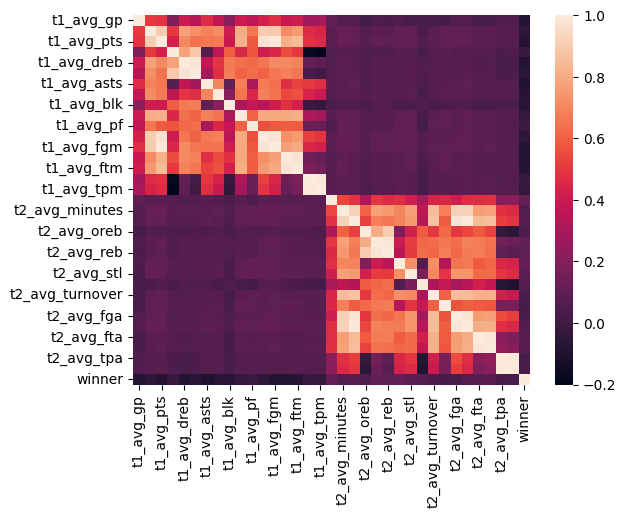

In [12]:
import seaborn as sns
x = games.drop(columns=['game_date','game_id', 't1_team_ilkid', 't2_team_ilkid'])
sns.heatmap(x.corr('spearman'))

In [13]:
X = games[games.columns[2:-3]]

scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)
X = pd.DataFrame(scaled_data, columns=X.columns)

y = games[games.columns[-1]]

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("accuracy = ", accuracy)
print(classification_report(y_test,y_pred))

accuracy =  0.5620728929384966
              precision    recall  f1-score   support

           0       0.60      0.57      0.58       941
           1       0.53      0.55      0.54       815

    accuracy                           0.56      1756
   macro avg       0.56      0.56      0.56      1756
weighted avg       0.56      0.56      0.56      1756

